In [1]:
# Load the dataset into pandas dataframe and print the sample of first 5 rows

import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/diksha-cl/machine_leearning_cl/master/insurance_data.csv')

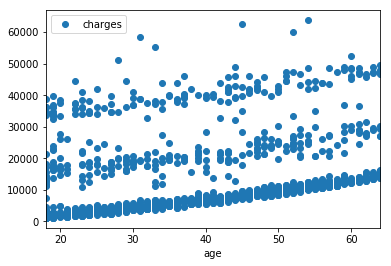

In [2]:
# Lets see how the charges vary with the age.
%matplotlib inline
df.plot(x='age', y='charges', style='o')

In [3]:
# Find the group characteristics, where the groups are defined as:
# group 0: charges < 11000, 
# group 1: charges >= 11000 and charges < 30000, 
# group 2: charges >= 30000

df['group'] = np.where(df.charges < 15000, 0, np.where(30000 <= df.charges, 2, 1))
df.groupby('group').agg(np.mean)

,age,bmi,children,smoker,obese,sex,charges
group,,,,,,,
0,38.845918,30.492469,1.056122,0.007143,0.515306,0.486735,7112.209423
1,40.045918,28.061454,1.229592,0.586735,0.260204,0.489796,21339.427399
2,40.376543,34.845432,1.166667,0.938272,0.919753,0.635802,40761.308558


In [4]:
c1 = int(df[(df.smoker == 0) & (df.obese == 0)]['charges'].mean())
c2 = int(df[(df.smoker == 0) & (df.obese == 1)]['charges'].mean())
c3 = int(df[(df.smoker == 1) & (df.obese == 0)]['charges'].mean())
c4 = int(df[(df.smoker == 1) & (df.obese == 1)]['charges'].mean())
print(c1, c2, c3, c4)

7966 8853 21369 41692


In [5]:
# We create a new feature which is the product of the smoker and obesity features.

df['smokOb'] = df['smoker'] * df['obese']
print("Number of customers who are both obese and smoke:", df[df.smokOb == 1].shape[0])
print("Total number of customers", df.shape[0])

Number of customers who are both obese and smoke: 144
Total number of customers 1338


In [6]:
# Create the pandas dataframe with the features and the pandas series with the target.

X = df[['age', 'bmi', 'children', 'smoker', 'obese', 'sex', 'smokOb']]
y = df['charges']

In [7]:
from sklearn import linear_model

# Let's create an instance for the LinerRegression model
lr = linear_model.LinearRegression()

# Train the model on our train dataset
lr.fit(X, y)

# Print the coefficients of the trained model.
coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeffs

,Coefficient
age,264.217528
bmi,91.801444
children,505.007978
smoker,13434.330529
obese,-734.023995
sex,-467.296184
smokOb,19860.775096


In [8]:
# Getting predictions from the model for the given examples.
predictions = lr.predict(X)

# Compare with the actual charges.
Scores = pd.DataFrame({'Actual': y})
column = pd.DataFrame({'Predictions': predictions})
Scores = Scores.join(column.set_index(Scores.index))
Scores.head()

,Actual,Predictions
0,16884.92400,16293.322314
1,1725.55230,2437.336532
2,4449.46200,6018.840654
3,21984.47061,5613.832489
4,3866.85520,5916.488877


In [9]:
# Lets evaluate the model for its accuracy using various metrics such as RMSE, 
# and especially R-squared.
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
print('Average Cost:', y.mean())
print('R-squared' , metrics.r2_score(y, predictions))

MAE: 2452.4664569912807
RMSE: 4460.511762340599
Average Cost: 13270.422265141257
R-squared 0.864229633041254
